In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as stats
import re 



sns.set() #setting the default seaborn style for our plots

In [3]:
df = pd.read_csv(r'D:\D\AI\Great learning 2021\Assignment\Statistical learning course project 2\DS+-+Part3+-+CompanyX_EU.csv')

In [4]:
df

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [5]:
print(df.dtypes)


Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object


In [6]:
df.shape

(662, 6)

In [7]:
df.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

In [8]:
x = df[df['Product'].isnull()].index.tolist()
print(x)
y = df[df['Funding'].isnull()].index.tolist()
print(y)

[257, 286, 318, 359, 445, 565]
[0, 2, 4, 7, 8, 9, 12, 19, 21, 23, 24, 25, 26, 29, 30, 33, 36, 38, 39, 41, 43, 45, 50, 57, 67, 69, 74, 75, 77, 78, 80, 84, 90, 91, 92, 93, 98, 101, 102, 103, 104, 111, 114, 121, 123, 125, 131, 133, 134, 135, 136, 151, 155, 163, 165, 173, 176, 177, 181, 185, 187, 189, 194, 196, 197, 201, 202, 206, 208, 221, 223, 224, 228, 230, 233, 237, 240, 242, 246, 250, 252, 253, 257, 264, 265, 267, 268, 269, 274, 277, 283, 286, 287, 288, 297, 299, 301, 306, 309, 311, 312, 318, 320, 321, 327, 331, 333, 335, 337, 338, 340, 341, 342, 343, 344, 345, 347, 349, 352, 353, 356, 359, 361, 367, 370, 371, 377, 378, 385, 391, 397, 402, 405, 406, 410, 411, 412, 420, 421, 425, 426, 440, 441, 444, 448, 452, 456, 457, 466, 467, 469, 470, 472, 481, 483, 488, 494, 497, 499, 501, 506, 507, 508, 509, 511, 512, 514, 515, 516, 518, 519, 526, 527, 529, 532, 533, 540, 541, 543, 544, 547, 550, 553, 559, 561, 568, 569, 573, 574, 580, 582, 584, 585, 587, 588, 592, 601, 602, 603, 604, 605, 607, 6

In [9]:
# 3.1 Dropping the Null values

df.dropna(axis = 0, inplace=True)

In [10]:
x = df[df['Product'].isnull()].index.tolist()
print(x)
y = df[df['Funding'].isnull()].index.tolist()
print(y)

[]
[]


In [11]:
df.shape

(446, 6)

In [12]:
df.isnull().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

In [13]:
# Removing $, K, M and B replacing with zero's

index = df.index

for i in index:
    df.Funding[i] = df.Funding[i].replace('$', '')
    df.Funding[i] = df.Funding[i].replace('K', '000')
    df.Funding[i] = df.Funding[i].replace('M', '000000')
    df.Funding[i] = df.Funding[i].replace('.', '')
    df.Funding[i] = df.Funding[i].replace('B', '000000000')
    df.Funding[i] = pd.to_numeric(df.Funding[i])
    
    
print(df.Funding)

1         630000
3        1000000
5      193000000
6       29000000
10      18000000
         ...    
657      8000000
658      1000000
659    223000000
660     34000000
661    315000000
Name: Funding, Length: 446, dtype: object


Text(0, 0.5, 'Fundings in Million')

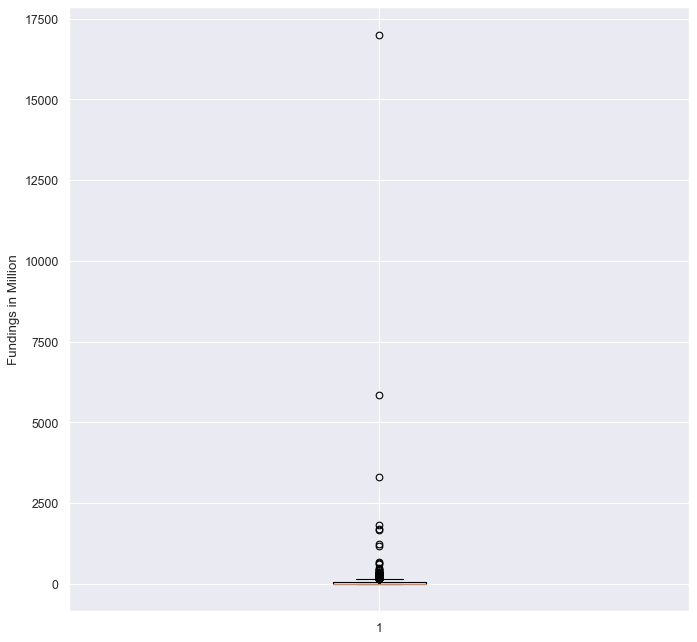

In [14]:
# Plot box plot for funds in million.
"""Do this later"""

# Converting values to million 
Funding = df['Funding'].div(1000000)
figure(figsize=(10, 10), dpi=80)
plt.boxplot(x = Funding)
plt.ylabel("Fundings in Million")


The lower fence is  5000.0
The lower inner fence is  -84791250.0
The lower outer fence is  -170466000.0


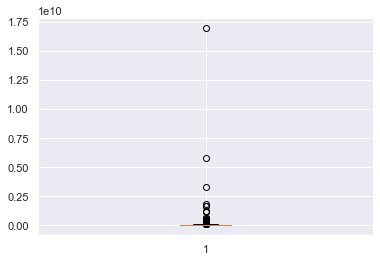

In [15]:
# Get the lower fence from the box plot.


B = plt.boxplot(x =df.Funding)
a = [item.get_ydata()[1] for item in B['whiskers']]
print("The lower fence is ", a[0])

Q1 = np.percentile(df.Funding, 25, interpolation = 'midpoint')
Q3 = np.percentile(df.Funding, 75, interpolation = 'midpoint')
IQR = stats.iqr(df.Funding, interpolation = 'midpoint')
lower_inner_fence = Q1 - (1.5 * (IQR))
lower_outer_fence = Q1 - (3 * (IQR))
print("The lower inner fence is ", lower_inner_fence)
print("The lower outer fence is ", lower_outer_fence)

In [16]:
# Check number of outliers greater than upper fence.

Upper_inner_fence = Q3 + (1.5 * (IQR))
Upper_outer_fence = Q3 + (3 * (IQR))
print("The Upper inner fence is ", Upper_inner_fence)
print("The Upper outer fence is ", Upper_outer_fence)

# print("The Upper fence is ", a[1])

count = 0
for i in df.Funding :
    if i > Upper_inner_fence:
        count = count + 1
print("Number of outliers greater than upper inner fence is", count)

count1 = 0

for i in df.Funding :
    if i > Upper_outer_fence:
        count1 = count1 + 1
print("Number of outliers greater than upper outer fence is", count1)

The Upper inner fence is  143674750.0
The Upper outer fence is  229349500.0
Number of outliers greater than upper inner fence is 54
Number of outliers greater than upper outer fence is 35


In [17]:
df

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,630000,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1000000,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,193000000,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,29000000,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,18000000,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,8000000,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,1000000,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,223000000,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,34000000,Disrupt SF 2013,Audience choice,Operating


In [18]:
# Drop the values that are greater than upper fence.

df1 = df[df['Funding'] < Upper_inner_fence]
print(max(df1.Funding))

142000000


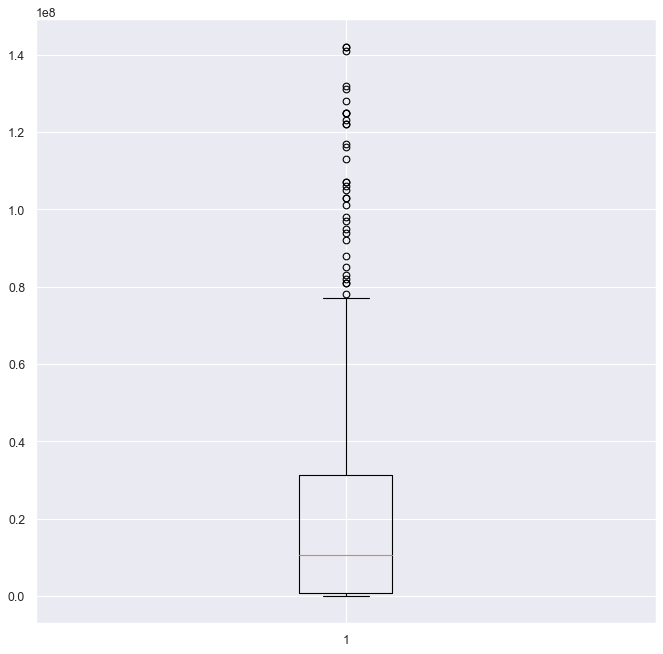

In [19]:
# Plot box plot after dropping the values

figure(figsize=(10, 10), dpi=80)
B = plt.boxplot(x = df1.Funding)

In [20]:
df1.columns

Index(['Startup', 'Product', 'Funding', 'Event', 'Result', 'OperatingState'], dtype='object')

In [21]:
df1

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,630000,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1000000,Disrupt NY 2016,Audience choice,Operating
6,8 Securities,8securities.com,29000000,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,18000000,Hardware Battlefield 2014,Contestant,Operating
11,AdRocket,adrocket.com,1000000,TC50 2008,Contestant,Closed
...,...,...,...,...,...,...
649,YouNow,younow.com,26000000,Disrupt SF 2011,Contestant,Operating
650,YourMechanic,yourmechanic.com,28000000,Disrupt SF 2012,Winner,Operating
657,Zivity,zivity.com,8000000,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,1000000,-,Audience choice,Operating


Text(0.5, 0, 'Result')

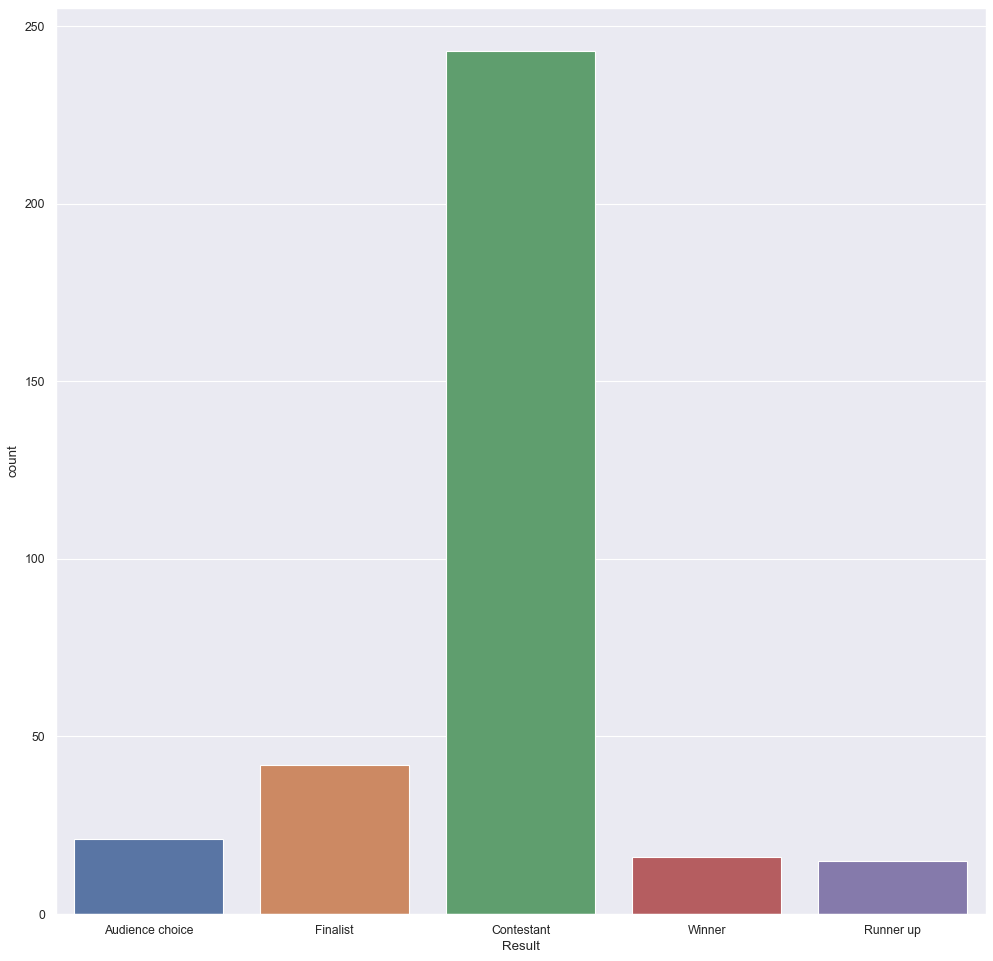

In [28]:
# Check frequency of the status features classes.

"""Do this later"""



<Figure size 1200x1200 with 0 Axes>

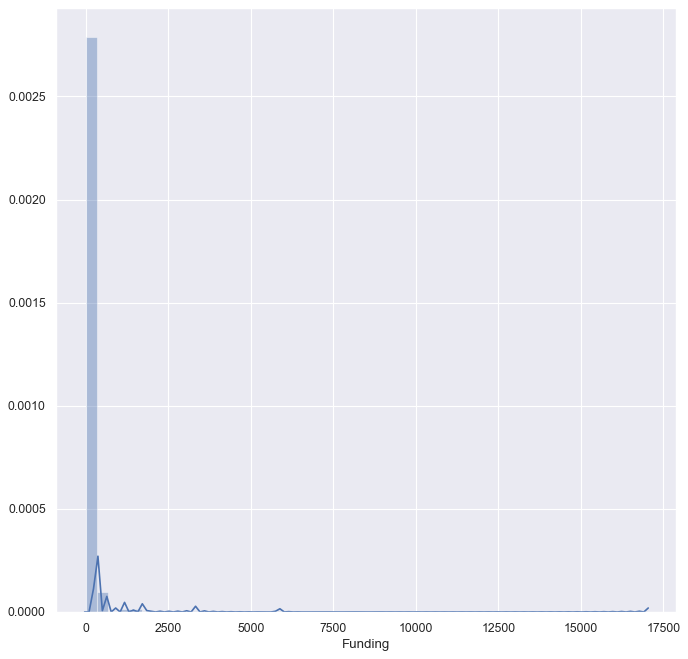

In [27]:
# Plot a distribution plot for Funds in million

"""Do this later"""
Funding1 = df['Funding'].div(1000000)
figure(figsize=(10, 10), dpi=80)
sns.distplot(Funding1)

Index(['Startup', 'Product', 'Funding', 'Event', 'Result', 'OperatingState'], dtype='object')


Text(0.5, 0, 'Result')

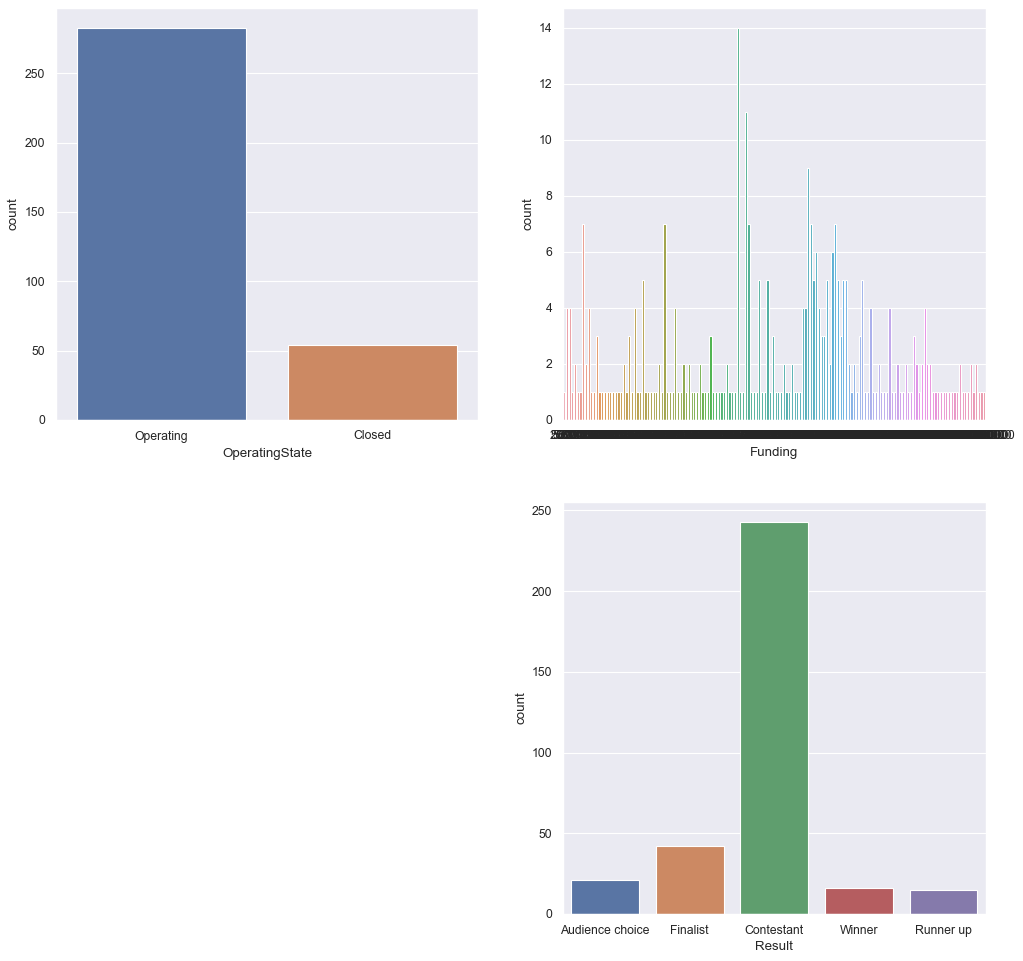

In [31]:
# Plot distribution plots for companies still operating and companies that closed.

"Do this later"

df2 = df1[df1['OperatingState'] == "Operating"]
df2 =  df2.append(df1[df1['OperatingState'] == "Closed"])
print(df2.columns)

figure(figsize=(15, 15), dpi=80)
plt.subplot(2,2,1)
sns.countplot(df2.OperatingState)
plt.xlabel("OperatingState")

plt.subplot(2,2,2)
sns.countplot(df2.Funding)
plt.xlabel("Funding")

plt.subplot(2,2,4)
sns.countplot(df2.Result)
plt.xlabel("Result")

# 4. Statistical analysis:

Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
Write the null hypothesis and alternative hypothesis.
Test for significance and conclusion


Hypothesis

Null Hypothesis: There is no difference between funds raised by companies that are still operating vs companies that are closed.

Alternate Hypothesis: There is difference between funds raised by companies that are still operating vs companies that are closed.

Step 2: Decide the significance level

Here we select α = 0.05

Step 3: Identify the test statistic  
    
Here we use T-Test

In [32]:
Operating = df2[df2['OperatingState'] == "Operating"]
Operating = Operating.Funding

Closed = df2[df2['OperatingState'] == "Closed"]
Closed = Closed.Funding

In [33]:
t_statistic, p_value  =  stats.ttest_ind(Operating,Closed)
print('P Value', p_value)  

P Value 0.012553812065845164


Since P value < Alpha. We reject Null hypothesis. So There is difference between funds raised by companies that are still operating vs companies that are closed.

In [34]:
# Make a copy of the original data frame.

df3 = df.copy()
df3

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,630000,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,1000000,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,193000000,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,29000000,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,18000000,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,8000000,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,1000000,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,223000000,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,34000000,Disrupt SF 2013,Audience choice,Operating


Text(0.5, 0, 'Result')

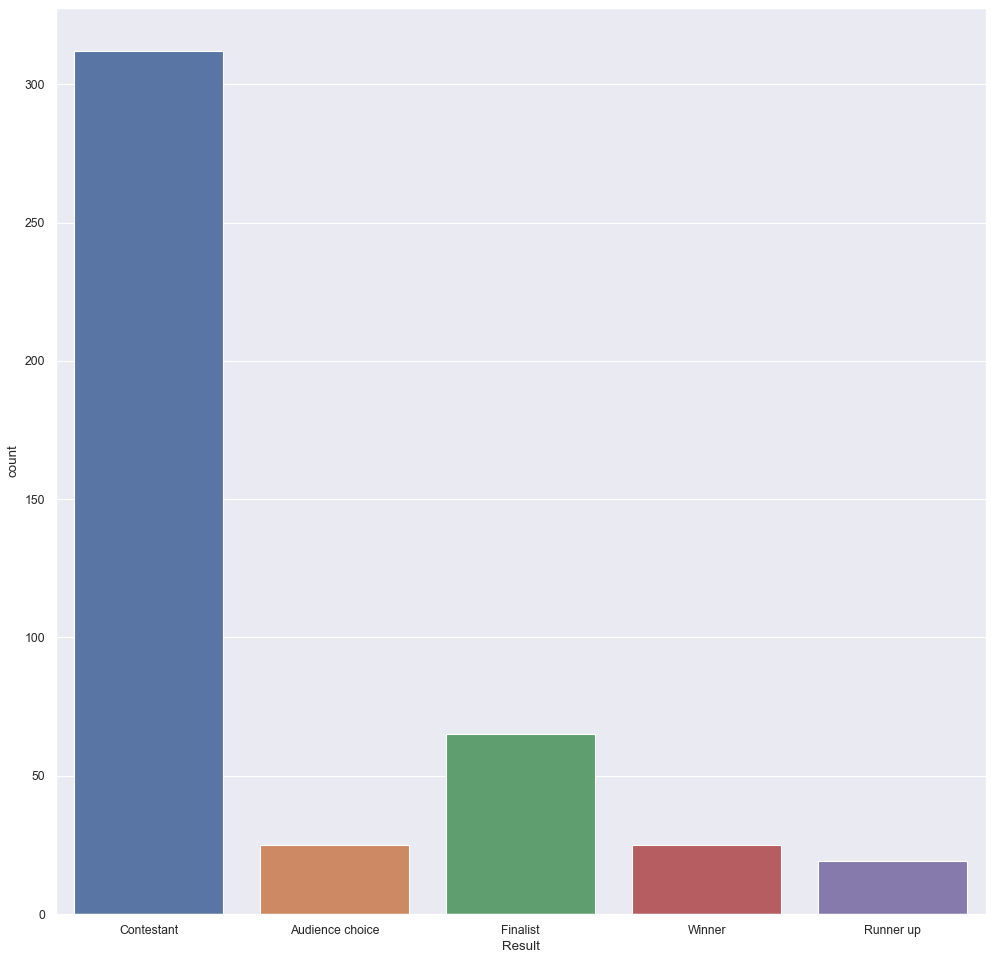

In [35]:
# Check frequency distribution of outcome variable.
"Do this later"

figure(figsize=(15, 15), dpi=80)
sns.countplot(df3.Result)
plt.xlabel("Result")

In [36]:
# Calculate percentage of winners that are still operating and percentage of contestants that are still operating

total = df3.shape[0]

Winners = df3[(df3['OperatingState'] == "Operating")]
Winners = Winners[Winners["Result"] == "Winner"]
Winners = Winners.shape[0]

Contestant = df3[(df3['OperatingState'] == "Operating")]
Contestant = Contestant[Contestant["Result"] == "Contestant"]
Contestant = Contestant.shape[0]

print("Percentage of winners that are still operating are", (Winners/total)*100, "%")
print("Percentage of Contestants that are still operating are", (Contestant/total)*100, "%")

Percentage of winners that are still operating are 4.0358744394618835 %
Percentage of Contestants that are still operating are 47.98206278026906 %


Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

Write the null hypothesis and alternative hypothesis.

Test for significance and conclusion

Hypothesis

Null Hypothesis: There is no difference in the proportion of companies that are operating between winners and contestants

Alternate Hypothesis: There is difference in the proportion of companies that are operating between winners and contestants.
That is the percentage of Winners are lower than the Operating contestants. Pw < Pc


For this test, we choose a 5% level of significance (α = 0.05).

In [30]:
Operating = df3[(df3['OperatingState'] == "Operating")]
print("Total sample =", Operating.shape[0])

print("Total winners from Operating state =", Winners)

print("Total contestants from Operating state =", Contestant)

print("Calculating difference in the sample proportion =", (Winners/Operating.shape[0]) - (Contestant/Operating.shape[0]))

Total sample = 319
Total winners from Operating state = 18
Total contestants from Operating state = 214
Calculating difference in the sample proportion = -0.6144200626959248


Assess the evidence.

Determine if a normal model is a good fit for the sampling distribution. Verify that there are at least 10 successes and failures in each sample. Here, a success is an contestant or winners in operating state. People that are contestant are 214 and winners are 18. The failure is 87.

In [30]:
"""Do this later"""

'Do this later'

Text(0.5, 0, 'Event')

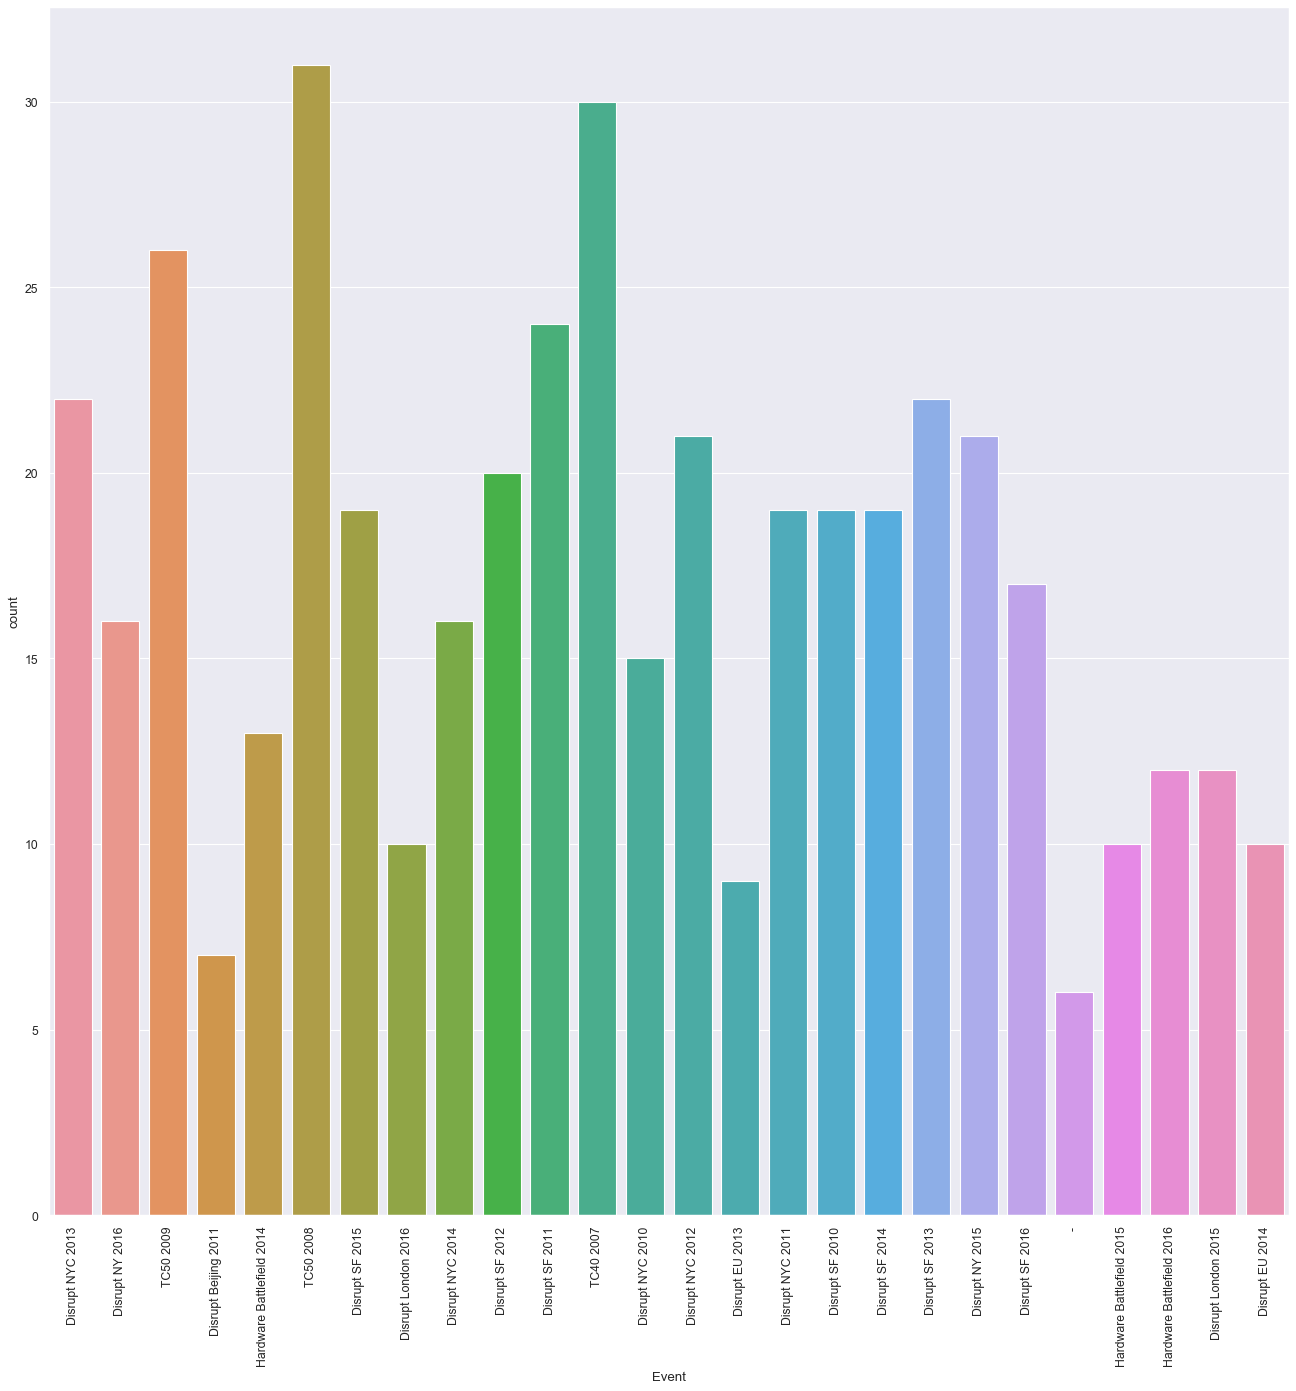

In [31]:
# Check distribution of the Event variable.

df3.Event.value_counts()
figure(figsize=(20, 20), dpi=80)
plt.xticks(rotation=90)
sns.countplot(df3.Event)
plt.xlabel("Event")

In [32]:
# Select only the Event that has disrupt keyword from 2013 onwards.


df3.Event.value_counts()
Disrupt = df3[((df3.Event.str.contains('Disrupt')))]
Disrupt["year"] = Disrupt.Event

year = []
for i in Disrupt.year:
    res = re.sub("\D", "", i)
    year.append(res)
    
for i in range(0, len(year)):
    year[i] = int(year[i])
    
Disrupt["year"] = year
Disrupt = Disrupt.reset_index(drop = True)

Disrupt1 = pd.DataFrame()
Index = []
for j in Disrupt.index:
    
    if Disrupt["year"][j] >= 2013:
        Index.append(j)

Disrupt1 = Disrupt.iloc[Index]
Disrupt1 = Disrupt1.reset_index(drop = True)
Disrupt1

C:\Users\sreev\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sreev\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Startup,Product,Funding,Event,Result,OperatingState,year
0,3DLT,3dlt.com,630000,Disrupt NYC 2013,Contestant,Closed,2013
1,3Dprintler,3dprintler.com,1000000,Disrupt NY 2016,Audience choice,Operating,2016
2,Agrilyst,agrilyst.com,1000000,Disrupt SF 2015,Winner,Operating,2015
3,Aiden,aiden.ai,750000,Disrupt London 2016,Contestant,Operating,2016
4,Aircall,aircall.io,116000000,Disrupt SF 2015,Contestant,Operating,2015
...,...,...,...,...,...,...,...
188,Workspot,workspot.com,158000000,Disrupt NYC 2013,Contestant,Operating,2013
189,Xendo,xendo.com,28000,Disrupt SF 2014,Contestant,Acquired,2014
190,YayPay Inc,yaypay.com,900000,Disrupt London 2015,Contestant,Operating,2015
191,Zenefits,zenefits.com,5836000000,Disrupt NYC 2013,Finalist,Operating,2013


In [36]:
Disrupt2 = pd.DataFrame()
Disrupt2 = Disrupt2.append(Disrupt1[((Disrupt1.Event.str.contains("NY")))])
Disrupt2 = Disrupt2.append(Disrupt1[((Disrupt1.Event.str.contains("SF")))])
Disrupt2 = Disrupt2.append(Disrupt1[((Disrupt1.Event.str.contains("EU")))])
Disrupt2 = Disrupt2[~Disrupt2.Event.str.contains("NYC")]
Disrupt2.Event.value_counts()

Disrupt SF 2013    22
Disrupt NY 2015    21
Disrupt SF 2015    19
Disrupt SF 2014    19
Disrupt SF 2016    17
Disrupt NY 2016    16
Disrupt EU 2014    10
Disrupt EU 2013     9
Name: Event, dtype: int64

Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$ = $\mu4$ = $\mu5$ = $\mu6$ = $\mu7$ = $\mu8$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$, $\mu3$, $\mu4$, $\mu5$, $\mu6$, $\mu7$, $\mu8$ are the mean Funds applied to each event.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 4: Calculate p value using ANOVA table

In [93]:
SF_2013 = np.array(Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt SF 2013")])
SF_2014 = np.array(Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt SF 2014")])
SF_2015 = np.array(Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt SF 2015")])
SF_2016 = np.array(Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt SF 2016")])

NY_2015 = np.array(Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt NY 2015")])
NY_2016 = np.array(Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt NY 2016")])

EU_2013 = np.array(Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt EU 2013")])
EU_2014 = np.array(Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt EU 2014")])

fvalue, pvalue = stats.f_oneway(SF_2013, SF_2014, SF_2015, SF_2016, NY_2015, NY_2016, EU_2013, EU_2014)
print("pvalue", pvalue)
print("Since pvalue is greater than Alpha we accept null hypothesis so all the Funding means are equal")

pvalue 0.13399255206617414
Since pvalue is greater than Alpha we accept null hypothesis so all the Funding means are equal


In [53]:
funds_df = pd.DataFrame()

df1 = pd.DataFrame({'City': 'SF 2013', 'Funding':Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt SF 2013")]})
df2 = pd.DataFrame({'City': 'SF 2014', 'Funding':Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt SF 2014")]})
df3 = pd.DataFrame({'City': 'SF 2015', 'Funding':Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt SF 2015")]})
df4 = pd.DataFrame({'City': 'SF 2016', 'Funding':Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt SF 2016")]})

df5 = pd.DataFrame({'City': 'NY 2015', 'Funding':Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt NY 2015")]})
df6 = pd.DataFrame({'City': 'NY 2016', 'Funding':Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt NY 2016")]})

df7 = pd.DataFrame({'City': 'EU 2013', 'Funding':Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt EU 2013")]})
df8 = pd.DataFrame({'City': 'EU 2014', 'Funding':Disrupt2["Funding"][(Disrupt2['Event'] == "Disrupt EU 2014")]})

funds_df = funds_df.append(df1) 
funds_df = funds_df.append(df2) 
funds_df = funds_df.append(df3) 
funds_df = funds_df.append(df4) 
funds_df = funds_df.append(df5) 
funds_df = funds_df.append(df6) 
funds_df = funds_df.append(df7) 
funds_df = funds_df.append(df8) 

funds_df = funds_df.reset_index(drop = True)

Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform
a better data analysis.